In [3]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy import stats
import sklearn.preprocessing
from env import user, password, host
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import os
import csv
import wrangle_zillow

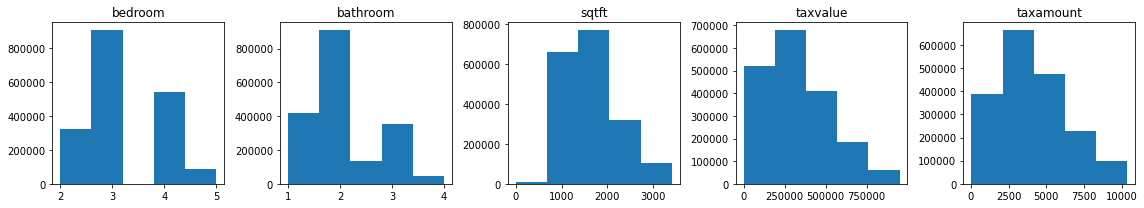

In [4]:
zillow_train,zillow_validate,zillow_test=wrangle_zillow.wrangle_zillow(1.5)

Text(0.5, 1.0, 'Scaled')

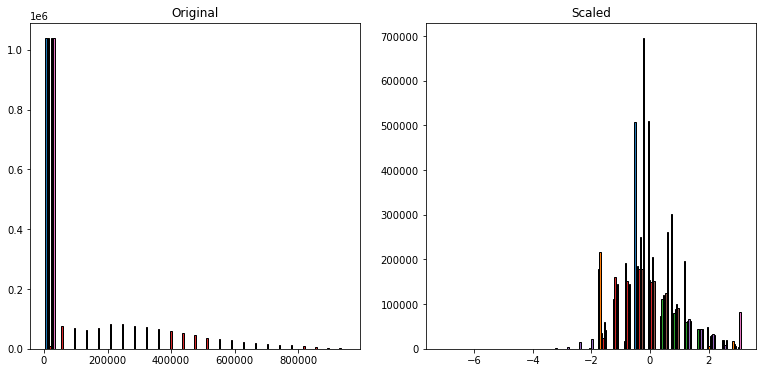

In [9]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(zillow_train)

zillow_train_scaled = scaler.transform(zillow_train)
zillow_validate_scaled = scaler.transform(zillow_validate)
zillow_test_scaled = scaler.transform(zillow_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(zillow_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(zillow_train_scaled, bins=25, ec='black')
plt.title('Scaled')